In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [2]:
data = pd.read_csv("cardata.csv")

In [3]:
df = pd.DataFrame(data)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df2 = df.drop(columns="Car_Name")

In [5]:
df2

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [6]:
df["Year"].describe()

count     301.000000
mean     2013.627907
std         2.891554
min      2003.000000
25%      2012.000000
50%      2014.000000
75%      2016.000000
max      2018.000000
Name: Year, dtype: float64

In [7]:
#convert car release year to its age
df3 = 2019 - df["Year"] 

In [8]:
df3

0       5
1       6
2       2
3       8
4       5
       ..
296     3
297     4
298    10
299     2
300     3
Name: Year, Length: 301, dtype: int64

In [9]:
df4 = df2.drop(columns = "Year")
df4.insert(7,"Year",df3)

In [10]:
df4

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


In [11]:
#checking missing value
df4.isnull().sum()

Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Year             0
dtype: int64

Text(0, 0.5, 'sell')

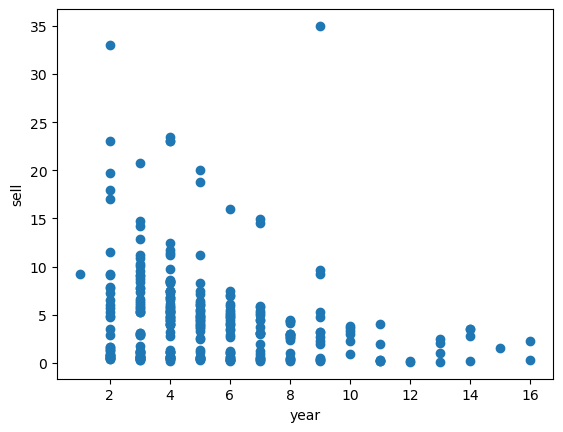

In [12]:
plt.scatter(df4["Year"],df4["Selling_Price"])
plt.xlabel("year")
plt.ylabel("sell")

Text(0, 0.5, 'sell')

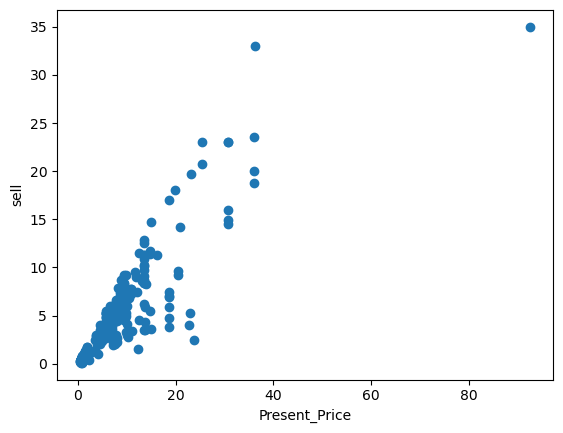

In [13]:
plt.scatter(df4["Present_Price"],df4["Selling_Price"])
plt.xlabel("Present_Price")
plt.ylabel("sell")

Text(0, 0.5, 'sell')

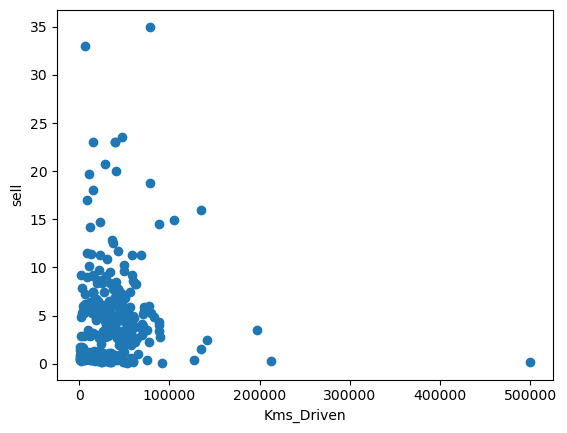

In [14]:
plt.scatter(df4["Kms_Driven"],df4["Selling_Price"])
plt.xlabel("Kms_Driven")
plt.ylabel("sell")

Text(0, 0.5, 'sell')

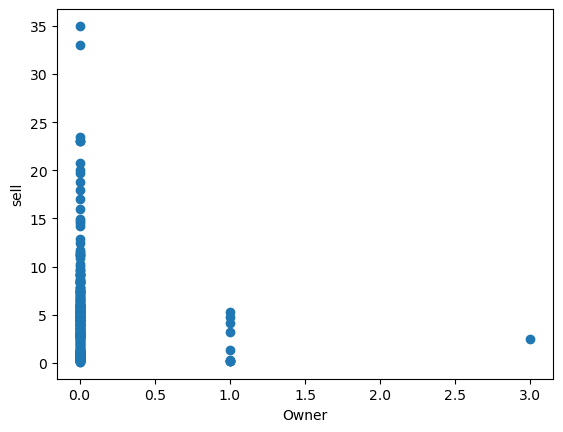

In [15]:
plt.scatter(df4["Owner"],df4["Selling_Price"])
plt.xlabel("Owner")
plt.ylabel("sell")

Text(0, 0.5, 'sell')

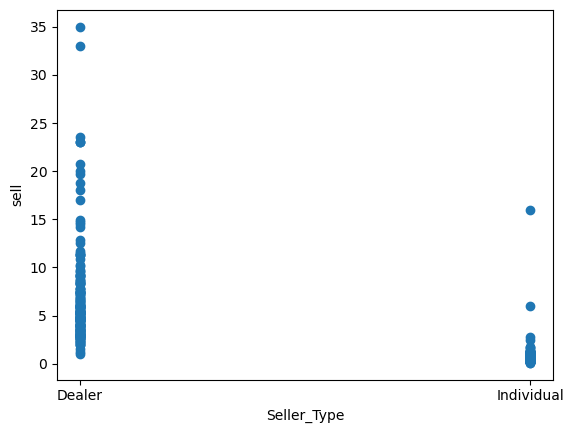

In [16]:
plt.scatter(df4["Seller_Type"],df4["Selling_Price"])
plt.xlabel("Seller_Type")
plt.ylabel("sell")

Text(0, 0.5, 'sell')

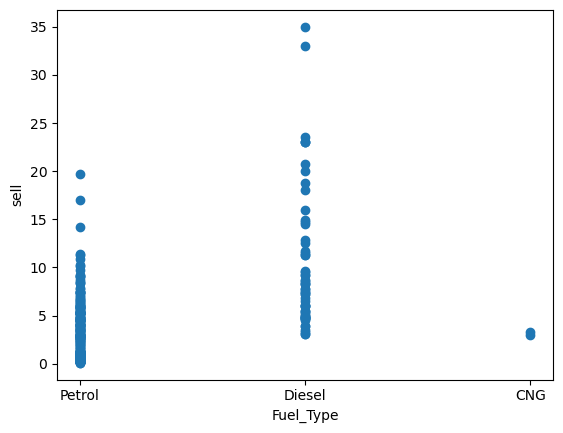

In [17]:
plt.scatter(df4["Fuel_Type"],df4["Selling_Price"])
plt.xlabel("Fuel_Type")
plt.ylabel("sell")

Text(0, 0.5, 'sell')

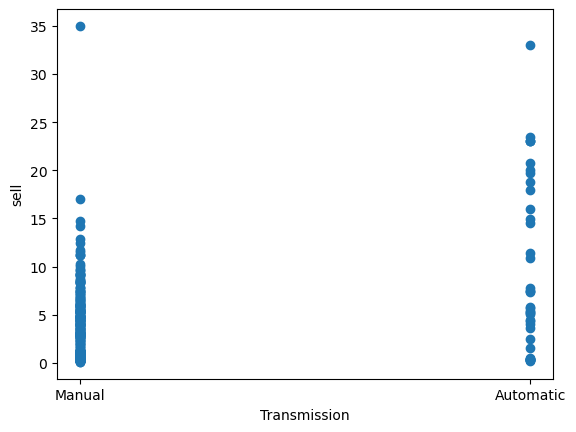

In [18]:
plt.scatter(df4["Transmission"],df4["Selling_Price"])
plt.xlabel("Transmission")
plt.ylabel("sell")

In [19]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  301 non-null    float64
 1   Present_Price  301 non-null    float64
 2   Kms_Driven     301 non-null    int64  
 3   Fuel_Type      301 non-null    object 
 4   Seller_Type    301 non-null    object 
 5   Transmission   301 non-null    object 
 6   Owner          301 non-null    int64  
 7   Year           301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


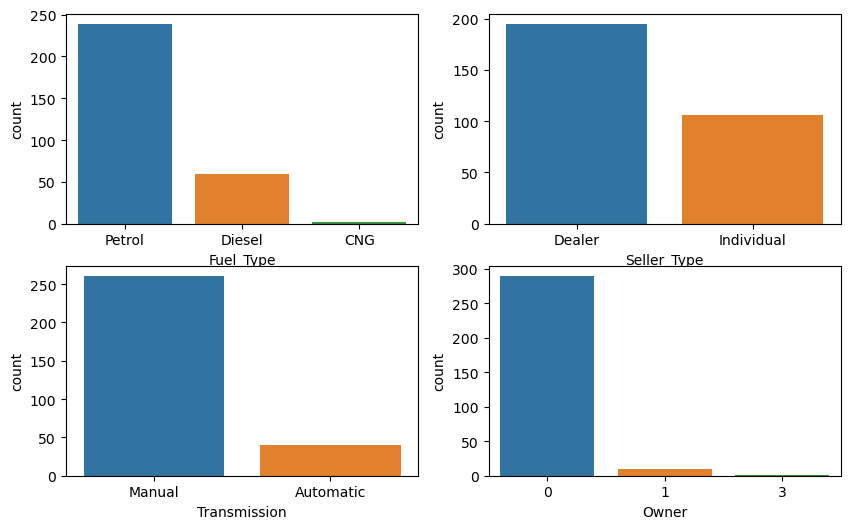

In [20]:
#analyse discrete features
features = ["Fuel_Type","Seller_Type","Transmission","Owner"]
i = 0
fig = plt.figure(figsize=[10,6])

while i<4:
    
    plt.subplot(2,2,i+1)
    sns.countplot(x=features[i],data = df4)
    i+=1
plt.show()

    

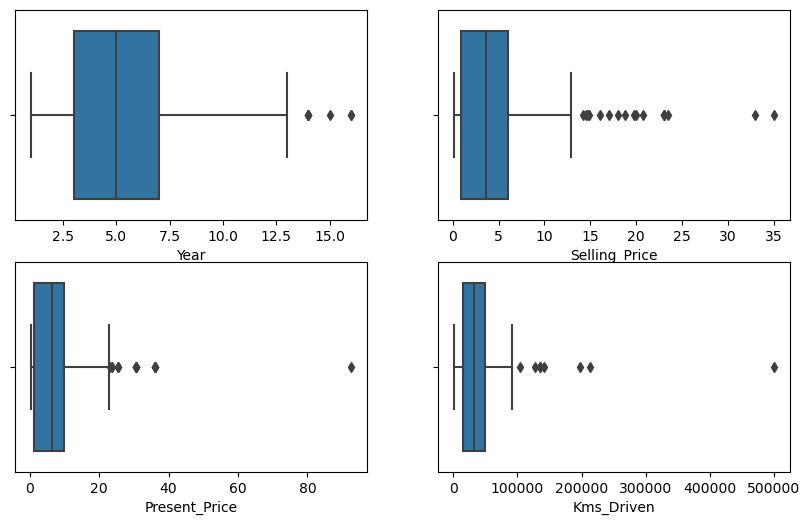

In [21]:
#analyse continuous feature
features = ["Year","Selling_Price","Present_Price","Kms_Driven"]
i = 0
fig = plt.figure(figsize=[10,6])

while i<4:
    
    plt.subplot(2,2,i+1)
    sns.boxplot(x=features[i],data = df4)
    i+=1
plt.show()


In [22]:
df4.corr()

C:\Users\test\AppData\Local\Temp\ipykernel_2360\3006967730.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df4.corr()


,Selling_Price,Present_Price,Kms_Driven,Owner,Year
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Year,-0.236141,0.047584,0.524342,0.182104,1.000000


In [23]:
#checking discrete data to convert string data to number for process
print(pd.unique(df4["Fuel_Type"]))
print(pd.unique(df4["Seller_Type"]))
print(pd.unique(df4["Transmission"]))
print(pd.unique(df4["Owner"]))

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [24]:
#converting string data to int
df4["Fuel_Type"].replace({"Petrol":2,"Diesel":3,"CNG":4},inplace=True)
df4["Seller_Type"].replace({"Dealer":2,"Individual":3},inplace=True)
df4["Transmission"].replace({"Manual":2,"Automatic":3},inplace=True)
df4

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


In [25]:
x = df4.drop("Selling_Price",axis = 1)
y = df4["Selling_Price"].values.reshape(-1,1)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

In [27]:
regressor = LinearRegression()

In [28]:
regressor.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred = regressor.predict(x_test)

In [30]:
metrics.r2_score(y_test,y_pred)

0.8484549412090379

In [31]:
regressor.score(x_test,y_test)

0.8484549412090379

In [32]:
k_fold = KFold(10)
print(cross_val_score(regressor,x,y,cv=k_fold))

[ 6.63522141e-01  8.80842763e-01  7.23708463e-01  8.63126108e-01
 -4.36488306e+01 -1.07944231e+03 -3.50129071e-01  7.84378582e-01
  8.27975783e-01  8.74089252e-01]


In [33]:
df4

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


In [34]:
df5 = df4[df4.index<120].append(df4[df4.index>210])
df5.reset_index(drop=True,inplace=True)

C:\Users\test\AppData\Local\Temp\ipykernel_2360\3037885511.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df5 = df4[df4.index<120].append(df4[df4.index>210])


In [35]:
df5

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
205,9.50,11.60,33988,3,2,2,0,3
206,4.00,5.90,60000,2,2,2,0,4
207,3.35,11.00,87934,2,2,2,0,10
208,11.50,12.50,9000,3,2,2,0,2


In [36]:
x2 = df5.drop("Selling_Price",axis=1)
y2 = df5["Selling_Price"].values.reshape(-1,1)
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.2,random_state=1)
regressor2 = LinearRegression()
regressor2.fit(x_train2,y_train2)
y_pred2 = regressor.predict(x_test2)

In [37]:
regressor2.score(x_test2,y_test2)

0.8793462370195001

In [38]:
metrics.r2_score(y_test2,y_pred2)

0.9121886463968175

In [39]:
for column in x :
    print(column)

Present_Price
Kms_Driven
Fuel_Type
Seller_Type
Transmission
Owner
Year


In [40]:
def improve(dimension):
    r2=metrics.r2_score(y_test2,y_pred2)
    
    for column in x :
        new_col_name = column  + str(dimension)
        new_col_value = x[column]**dimension
        x.insert(0,new_col_name,new_col_value)
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train,y_train)
        y_pred = regressor.predict(x_test)
        new_r2 = metrics.r2_score(y_test,y_pred)
        if new_r2<r2:
            print(f"dimension increase in {column} will damage your model,new r2 : ",new_r2)
            x.drop(new_col_name,axis=1,inplace=True)
        else:
            r2=new_r2
    print(r2)

In [41]:
improve(2)

dimension increase in Seller_Type will damage your model,new r2 :  0.9285797470223011
dimension increase in Transmission will damage your model,new r2 :  0.9285797134390654
dimension increase in Year will damage your model,new r2 :  0.9266918817882551
0.9311515383402565


In [42]:
def improve_by_test(start,stop):
    r2 = 0.9311515383402565
    for i in range(start,stop):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=i/100,random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train,y_train)
        y_pred = regressor.predict(x_test)
        new_r2 = metrics.r2_score(y_test,y_pred)
        if new_r2>r2:
            r2=new_r2
            print(f"increase in r2 in {i/100} test size")


    print(r2)
    

In [43]:
improve_by_test(5,40)

increase in r2 in 0.18 test size
increase in r2 in 0.19 test size
0.9350246963668946


In [44]:
x

,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year
0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...
296,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
297,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
298,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
299,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [45]:
press_kms = x["Present_Price"]*x["Kms_Driven"]
press_kms2 = x["Present_Price"]*x["Kms_Driven2"]
press_fuel = x["Present_Price"]*x["Fuel_Type"]
press_fuel2 = x["Present_Price"]*x["Fuel_Type2"]
press2_kms = x["Present_Price2"]*x["Kms_Driven"]
press2_kms2 = x["Present_Price2"]*x["Kms_Driven2"]
press2_fuel = x["Present_Price2"]*x["Fuel_Type"]
press2_fuel2 = x["Present_Price2"]*x["Fuel_Type2"]

In [46]:
x.insert(0,"press_kms",press_kms)
x.insert(0,"press_kms2",press_kms2)
x.insert(0,"press_fuel",press_fuel)
x.insert(0,"press_fuel2",press_fuel2)
x.insert(0,"press2_kms",press2_kms)
x.insert(0,"press2_kms2",press2_kms2)
x.insert(0,"press2_fuel",press2_fuel)
x.insert(0,"press2_fuel2",press2_fuel2)


In [47]:
x

,press2_fuel2,press2_fuel,press2_kms2,press2_kms,press_fuel2,press_fuel,press_kms2,press_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
297,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
298,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
299,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [48]:
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.19,random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train,y_train)
        y_pred = regressor.predict(x_test)
        metrics.r2_score(y_test,y_pred)

0.9549457101709536

In [49]:
def train(my_x,my_y,test):
        x_train,x_test,y_train,y_test = train_test_split(my_x,my_y,test_size=test,random_state=0)
        regressor = LinearRegression()
        regressor.fit(x_train,y_train)
        y_pred = regressor.predict(x_test)
        print(metrics.r2_score(y_test,y_pred))

In [50]:
train(x,y,0.19)

0.9549457101709536


In [51]:
k_fold = KFold(5)
resault = (cross_val_score(regressor,x,y,cv=k_fold,n_jobs=-1))

In [52]:
resault

array([  0.92455676,   0.47752024, -23.72858563,   0.58594545,
         0.88656002])

In [53]:
print(301/10)

30.1


In [54]:
x_new = x[x.index<100].append(x[x.index>151])
x_new.reset_index(drop = True ,inplace = True)


C:\Users\test\AppData\Local\Temp\ipykernel_2360\2679439424.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_new = x[x.index<100].append(x[x.index>151])


In [55]:
x_new

,press2_fuel2,press2_fuel,press2_kms2,press2_kms,press_fuel2,press_fuel,press_kms2,press_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
245,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
246,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
247,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [56]:
x_new

,press2_fuel2,press2_fuel,press2_kms2,press2_kms,press_fuel2,press_fuel,press_kms2,press_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
245,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
246,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
247,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [57]:
y=data["Selling_Price"]
y_new = y[y.index<100].append(y[y.index>151])
y_new.reset_index(drop = True ,inplace = True)


C:\Users\test\AppData\Local\Temp\ipykernel_2360\1425677599.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_new = y[y.index<100].append(y[y.index>151])


In [58]:
y_new

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
244     9.50
245     4.00
246     3.35
247    11.50
248     5.30
Name: Selling_Price, Length: 249, dtype: float64

In [59]:
train(x_new,y_new,0.20)

0.9771367089425416


In [60]:
x_new

,press2_fuel2,press2_fuel,press2_kms2,press2_kms,press_fuel2,press_fuel,press_kms2,press_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
245,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
246,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
247,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [61]:
y_new

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
244     9.50
245     4.00
246     3.35
247    11.50
248     5.30
Name: Selling_Price, Length: 249, dtype: float64

In [62]:
x_new.insert(0,"target",y_new)
dataframe = x_new
scaler = preprocessing.StandardScaler().fit(dataframe)
norm = scaler.transform(dataframe.astype(float))
print(norm[0:5])

[[-0.398127   -0.19915804 -0.20857162 -0.17766421 -0.18249747 -0.41783499
  -0.40646559 -0.32743706 -0.37839012 -0.12111947 -0.55546267 -0.16267654
  -0.22230105 -0.376193   -0.34786088 -0.5648916  -0.52623481 -0.43747864
  -0.18219501 -0.21290707]
 [-0.13156711 -0.06568925 -0.08708744 -0.13816369 -0.1138933   0.38333475
   0.25999513 -0.14758589 -0.01231794 -0.12111947  1.57895407 -0.09399154
  -0.11908416  0.06588333  0.04254822  1.63288979 -0.52623481 -0.43747864
  -0.18219501  0.12262369]
 [ 0.34443269 -0.14856776 -0.13266583 -0.18259446 -0.18639148 -0.20284393
  -0.08087813 -0.3752514  -0.49552221 -0.12111947 -0.55546267 -0.20446339
  -0.1087028   0.10057793 -0.83831231 -0.5648916  -0.52623481 -0.43747864
  -0.18219501 -1.21949936]
 [-0.49332696 -0.20994581 -0.22475761 -0.18372207 -0.1993511  -0.49050802
  -0.51652333 -0.37998149 -0.56100972 -0.12111947 -0.55546267 -0.20572486
  -0.24652451 -0.53735501 -0.87979328 -0.5648916  -0.52623481 -0.43747864
  -0.18219501  0.79368522]
 [-0

In [63]:
x_norm = dataframe.drop(["target"],axis=1)
y_norm = dataframe["target"].values.reshape(-1,1)

In [64]:
train(x_norm,y_norm,0.2)

0.9771367089425416


In [65]:
x_test.insert(0,"y_test",y_test)
x_test.insert(0,"y_prediction",y_pred)
x_test

,y_prediction,y_test,press2_fuel2,press2_fuel,press2_kms2,press2_kms,press_fuel2,press_fuel,press_kms2,press_kms,...,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year
223,6.009273,8.25,795.240000,265.080000,3.329075e+11,5.423625e+06,84.600,28.200,3.541570e+10,576981.40,...,9,3767627161,88.360000,9.400,61381,3,2,2,0,4
150,-0.612716,0.50,2.729104,1.364552,2.456194e+07,4.093656e+03,3.304,1.652,2.973600e+07,4956.00,...,4,36000000,0.682276,0.826,6000,2,3,2,0,8
226,4.165422,5.25,129.960000,64.980000,1.978653e+10,8.017882e+05,22.800,11.400,3.471321e+09,140664.60,...,4,609003684,32.490000,5.700,24678,2,2,2,0,4
296,9.189788,9.50,1211.040000,403.680000,1.554416e+11,4.573425e+06,104.400,34.800,1.340014e+10,394260.80,...,9,1155184144,134.560000,11.600,33988,3,2,2,0,3
52,18.851403,18.00,3517.676100,1172.558700,8.794190e+10,5.862794e+06,177.930,59.310,4.448250e+09,296550.00,...,9,225000000,390.852900,19.770,15000,3,2,3,0,2
261,5.061055,5.50,142.563600,71.281800,1.117699e+09,1.995890e+05,23.880,11.940,1.872192e+08,33432.00,...,4,31360000,35.640900,5.970,5600,2,2,2,0,3
246,3.930521,3.75,184.416400,92.208200,5.647752e+10,1.613644e+06,27.160,13.580,8.317750e+09,237650.00,...,4,1225000000,46.104100,6.790,35000,2,2,2,0,7
166,0.147788,0.45,1.210000,0.605000,3.025000e+05,3.025000e+02,2.200,1.100,5.500000e+05,550.00,...,4,1000000,0.302500,0.550,1000,2,3,2,0,3
221,5.044558,4.50,184.416400,92.208200,4.721060e+10,1.475331e+06,27.160,13.580,6.952960e+09,217280.00,...,4,1024000000,46.104100,6.790,32000,2,2,3,0,6
215,5.357511,4.50,353.440000,176.720000,1.151516e+11,3.189796e+06,37.600,18.800,1.225017e+10,339340.00,...,4,1303210000,88.360000,9.400,36100,2,2,2,0,7


In [66]:
new_df = x_test.sort_values(by="Present_Price")
a=new_df.Present_Price
b=new_df.y_test
c=new_df.Present_Price
d=new_df.y_prediction

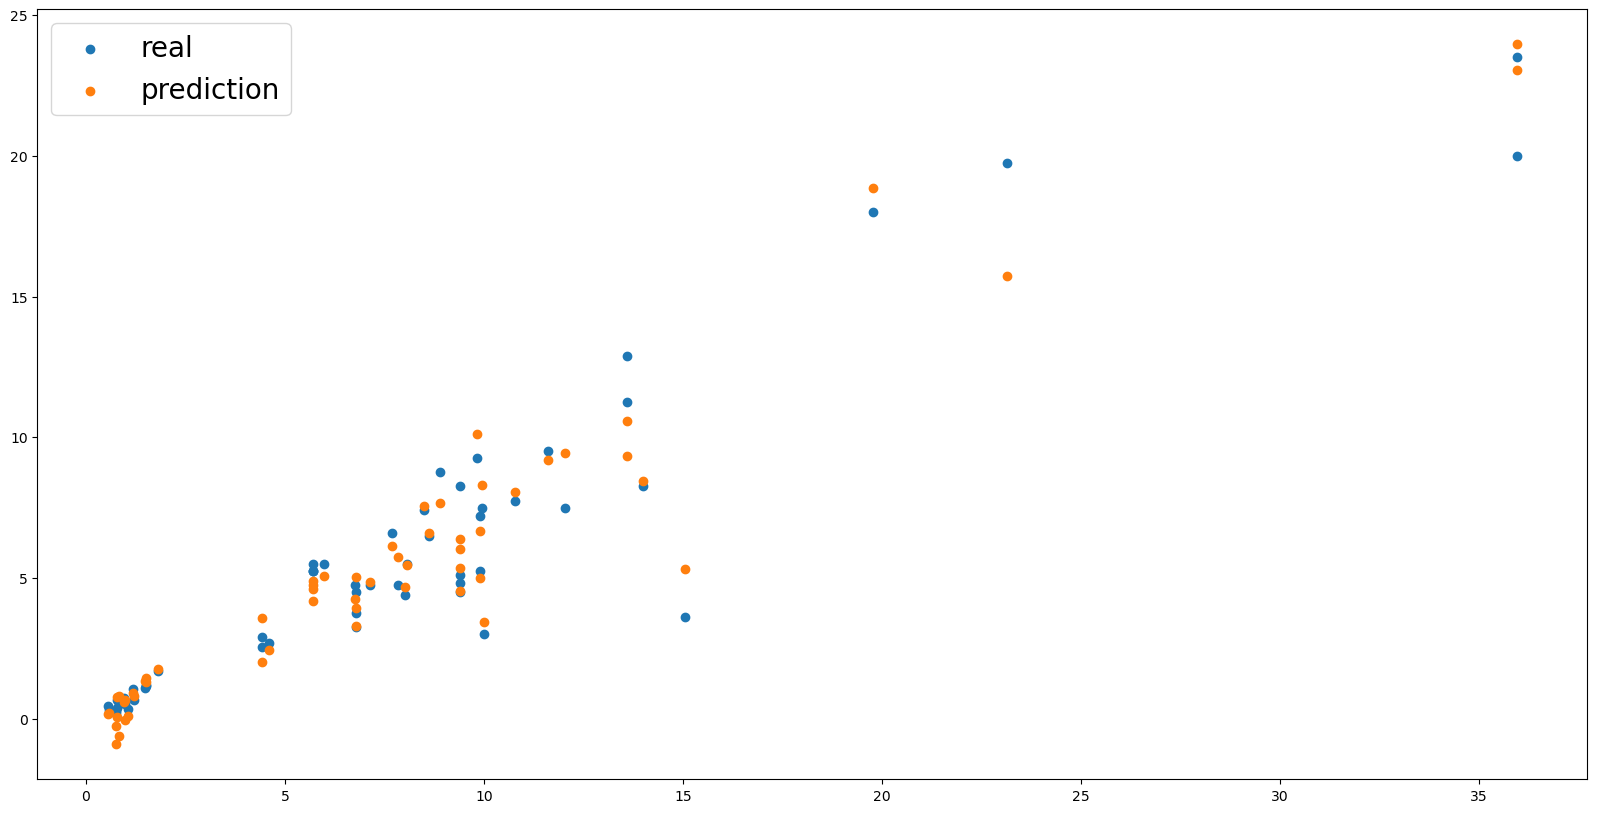

In [67]:
plt.figure(figsize=(20,10))
plt.scatter(a,b,label="real")
plt.scatter(c,d,label="prediction")
plt.legend(fontsize=20)
plt.show()


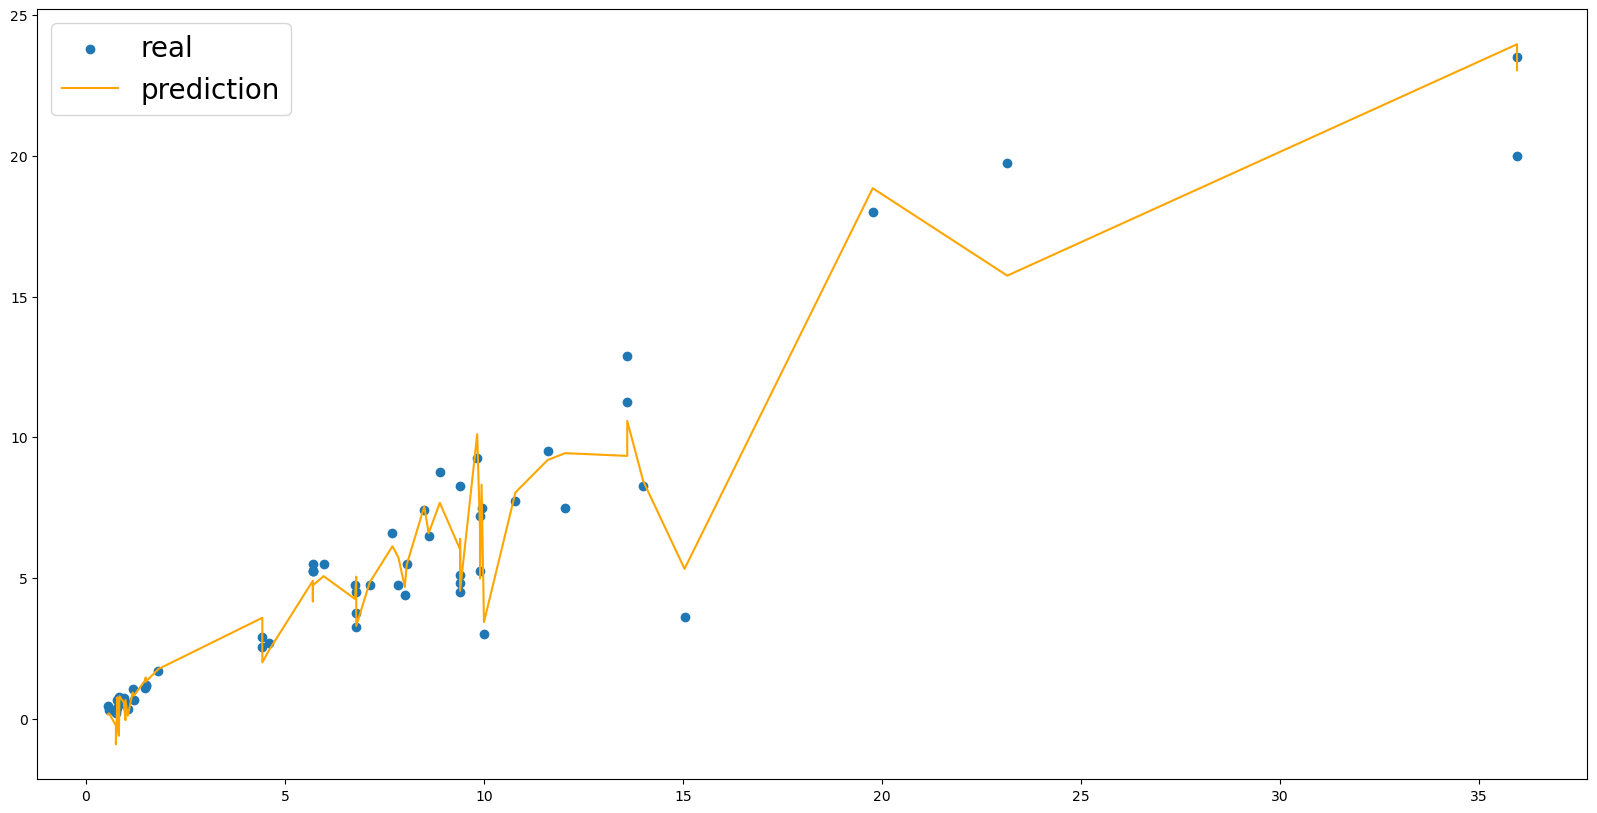

In [68]:
plt.figure(figsize=(20,10))
plt.scatter(a,b,label="real")
plt.plot(c,d,label="prediction",color="orange")
plt.legend(fontsize=20)
plt.show()

In [69]:
dataframe.columns

Index(['target', 'press2_fuel2', 'press2_fuel', 'press2_kms2', 'press2_kms',
       'press_fuel2', 'press_fuel', 'press_kms2', 'press_kms', 'Owner2',
       'Fuel_Type2', 'Kms_Driven2', 'Present_Price2', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner',
       'Year'],
      dtype='object')

In [70]:
Present_Price = 11.23
Year = 10
Fuel_Type = 2 #patrol
Seller_Type = 2 #dealer
Owner = 1
Kms_Driven = 42000
Transmission = 2 #manual
input_model = pd.DataFrame({"target":0,
                           "press2_fuel2":[(Present_Price**2)*(Fuel_Type**2)],
                           "press2_fuel":[(Present_Price**2)*(Fuel_Type)],
                           "press2_kms2":[(Present_Price**2)*(Kms_Driven**2)],
                           "press2_kms":[(Present_Price**2)*(Kms_Driven)],
                           "press_fuel2":[(Present_Price)*(Fuel_Type**2)],
                           "press_fuel":[(Present_Price)*(Fuel_Type)],
                           "press_kms2":[(Present_Price)*(Kms_Driven**2)],
                           "press_kms":[(Present_Price)*(Kms_Driven)],
                           "Owner2":[(Owner**2)],
                           "Fuel_Type2":[(Fuel_Type**2)],
                           "Kms_Driven2":[(Kms_Driven**2)],
                           "Present_Price2":[(Present_Price**2)],
                           "Present_Price":[(Present_Price)],
                           "Kms_Driven":[(Kms_Driven)],
                           "Fuel_Type":[(Fuel_Type)],
                           "Seller_Type":[(Seller_Type)],
                           "Transmission":[(Transmission)],
                           "Owner":[(Owner)],
                           "Year":[(Year)]
                           })


In [71]:
final_df = dataframe.append(input_model)

C:\Users\test\AppData\Local\Temp\ipykernel_2360\910259286.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = dataframe.append(input_model)


In [72]:
final_df

,target,press2_fuel2,press2_fuel,press2_kms2,press2_kms,press_fuel2,press_fuel,press_kms2,press_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year
0,3.35,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,4.75,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,7.25,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,2.85,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,4.60,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,4.00,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
246,3.35,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
247,11.50,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2
248,5.30,139.2400,69.6200,1.039263e+09,1.902018e+05,23.60,11.80,1.761462e+08,32237.6,0,4,29855296,34.8100,5.90,5464,2,2,2,0,3


In [73]:
x=final_df.drop("target",axis=1)[:249]
y=final_df[["target"]][:249]
x_final=final_df.drop("target",axis=1)[249:]

In [74]:
x_final

,press2_fuel2,press2_fuel,press2_kms2,press2_kms,press_fuel2,press_fuel,press_kms2,press_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year
0,504.4516,252.2258,2.224632e+11,5296741.8,44.92,22.46,1.980972e+10,471660.0,1,4,1764000000,126.1129,11.23,42000,2,2,2,1,10


In [75]:
regressor.fit(x,y)
y_prediction = regressor.predict(x_final)

In [76]:
y_prediction

array([[5.26089138]])

In [77]:

Present_Price = float(input("enter present price : "))
Year = float(input("enter year : "))
Fuel_Type =  int(input("enter fuel type (2 for petrol,3 for diesel ,4 for cng): "))
Seller_Type =  float(input("enter seller type(2 for dealer ,3 for invidual): "))
Owner = float(input("enter number of owners : "))
Kms_Driven = float(input("enter kilometers driven : "))
Transmission = float(input("enter transmission type(2 for manual , 3 for auto) : "))
input_model = pd.DataFrame({"target":0,
                           "press2_fuel2":[(Present_Price**2)*(Fuel_Type**2)],
                           "press2_fuel":[(Present_Price**2)*(Fuel_Type)],
                           "press2_kms2":[(Present_Price**2)*(Kms_Driven**2)],
                           "press2_kms":[(Present_Price**2)*(Kms_Driven)],
                           "press_fuel2":[(Present_Price)*(Fuel_Type**2)],
                           "press_fuel":[(Present_Price)*(Fuel_Type)],
                           "press_kms2":[(Present_Price)*(Kms_Driven**2)],
                           "press_kms":[(Present_Price)*(Kms_Driven)],
                           "Owner2":[(Owner**2)],
                           "Fuel_Type2":[(Fuel_Type**2)],
                           "Kms_Driven2":[(Kms_Driven**2)],
                           "Present_Price2":[(Present_Price**2)],
                           "Present_Price":[(Present_Price)],
                           "Kms_Driven":[(Kms_Driven)],
                           "Fuel_Type":[(Fuel_Type)],
                           "Seller_Type":[(Seller_Type)],
                           "Transmission":[(Transmission)],
                           "Owner":[(Owner)],
                           "Year":[(Year)]
                           })
final_df = dataframe.append(input_model)
x=final_df.drop("target",axis=1)[:249]
y=final_df[["target"]][:249]
x_final=final_df.drop("target",axis=1)[249:]
regressor.fit(x,y)
y_prediction = regressor.predict(x_final)
print(y_prediction)


enter present price : 11.23
enter year : 10
enter fuel type (2 for petrol,3 for diesel ,4 for cng): 2
enter seller type(2 for dealer ,3 for invidual): 2
enter number of owners : 1
enter kilometers driven : 42000
enter transmission type(2 for manual , 3 for auto) : 2
[[5.26089138]]


C:\Users\test\AppData\Local\Temp\ipykernel_2360\1480092367.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = dataframe.append(input_model)
